# LAB 6: Random Walks & Distributions - Chapter 7

### * Read the chapter carefully, and complete the assignments in the three sections.

### * Pay special attention to the presentation here (your grade will depend on that!); that means both, graphs as well as your WORDS analyzing the data and explaining your reasoning and choices. 

In [1]:
import numpy as np, matplotlib.pyplot as plt
from numpy.random import random as rng
import scipy.special as sc

###  <font color='red'> 7.1 Generating and Plotting Trajectories

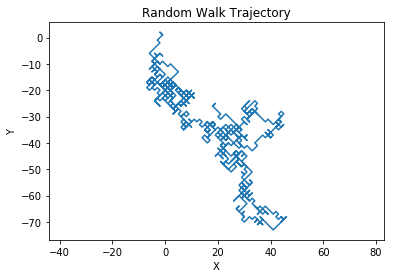

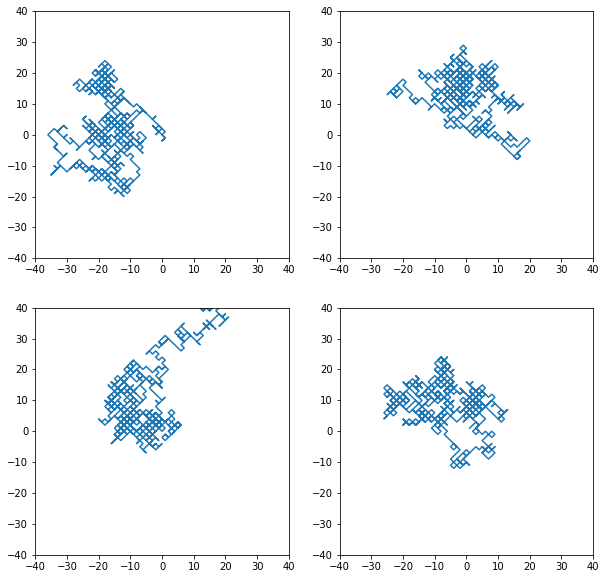

In [2]:
#Section 7.1 Assignment ~ Solutions
#Part (a)
def random_walk(num_steps):
    x_step = rng(num_steps)
    y_step = rng(num_steps)

    x_step[x_step > 0.5] = 1
    x_step[x_step < 0.5] = -1
    y_step[y_step > 0.5] = 1
    y_step[y_step < 0.5] = -1

    x = np.cumsum(x_step)
    y = np.cumsum(y_step)
    return x, y

walk_x, walk_y = random_walk(1000)
plt.plot(walk_x, walk_y)
plt.title("Random Walk Trajectory")
plt.xlabel("X"); plt.ylabel("Y"); 
plt.axis('equal')
plt.show()

#Part (b)
plt.figure(figsize=(10,10))

#Subplot 1
walk1_x, walk1_y = random_walk(1000)
plt.subplot(2,2,1)
plt.plot(walk1_x, walk1_y)
plt.xlim(-40, 40); plt.ylim(-40, 40)

#Subplot 2
walk2_x, walk2_y = random_walk(1000)
plt.subplot(2,2,2)
plt.plot(walk2_x, walk2_y)
plt.xlim(-40, 40); plt.ylim(-40, 40)

#Subplot 3
walk3_x, walk3_y = random_walk(1000)
plt.subplot(2,2,3)
plt.plot(walk3_x, walk3_y)
plt.xlim(-40, 40); plt.ylim(-40, 40)

#Subplot 4
walk4_x, walk4_y = random_walk(1000)
plt.subplot(2,2,4)
plt.plot(walk4_x, walk4_y)
plt.xlim(-40, 40); plt.ylim(-40, 40)

plt.show()

###  <font color='red'> 7.2 Plotting the Displacement Distribution

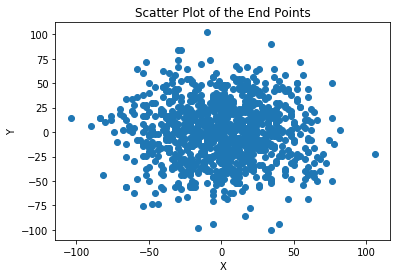

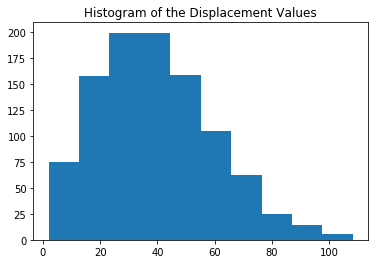

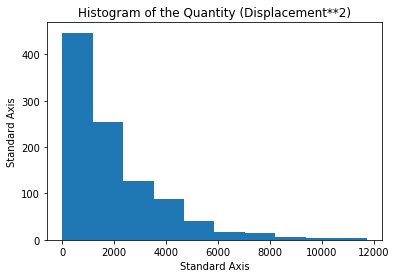

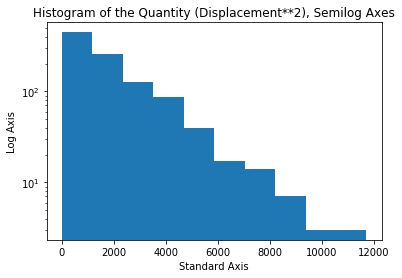

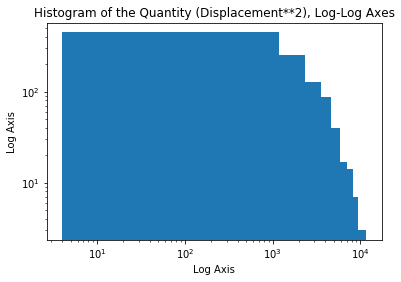

The mean-square displacement for a random walk of 1000 steps is 1936.128
The mean-square displacement for a random walk of 4000 steps is 2024.011


In [5]:
#Section 7.2 Assignment ~ Solutions
#Part (a)
def many_walks(num_walks):
    num_steps = 1000
    displacement = list()
    x_final = list()
    y_final = list()
    for i in np.arange(0, num_walks, 1):
        x, y = random_walk(num_steps)
        x_final.append(x[-1])
        y_final.append(y[-1])
        displacement.append(np.sqrt(x[-1]**2 + y[-1]**2))
    return x_final, y_final, displacement

x_val_1000, y_val_1000, disp_1000 = many_walks(1000)
plt.scatter(x_val_1000, y_val_1000)
plt.title("Scatter Plot of the End Points")
plt.xlabel("X"); plt.ylabel("Y");
plt.show()

#Part (b)
plt.hist(disp_1000)
plt.title("Histogram of the Displacement Values")
plt.show()

#Part (c)
quantity = np.asarray(disp_1000)**2
plt.hist(quantity)
plt.title("Histogram of the Quantity (Displacement**2)")
plt.xlabel("Standard Axis"); plt.ylabel("Standard Axis")
plt.show()

#Part (d)
plt.hist(quantity)
plt.yscale("log")
plt.title("Histogram of the Quantity (Displacement**2), Semilog Axes")
plt.xlabel("Standard Axis"); plt.ylabel("Log Axis")
plt.show()

plt.hist(quantity)
plt.xscale("log")
plt.yscale("log")
plt.title("Histogram of the Quantity (Displacement**2), Log-Log Axes")
plt.xlabel("Log Axis"); plt.ylabel("Log Axis")
plt.show()

#Part (e)
mean_square_displacement_1000 = np.mean(quantity)
print("The mean-square displacement for a random walk of 1000 steps is", mean_square_displacement_1000)

#Part (f)
x_val_4000, y_val_4000, disp_4000 = many_walks(4000)
quantity = np.asarray(disp_4000)**2
mean_square_displacement_4000 = np.mean(quantity)
print("The mean-square displacement for a random walk of 4000 steps is", mean_square_displacement_4000)

###  <font color='red'> 7.3 Rare Events

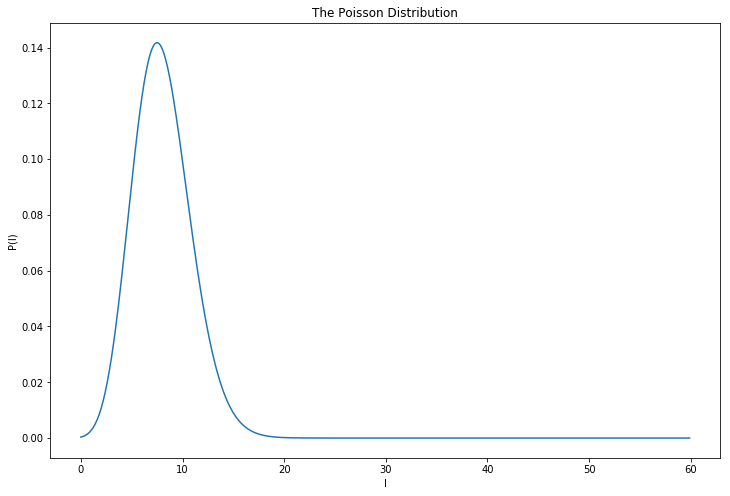

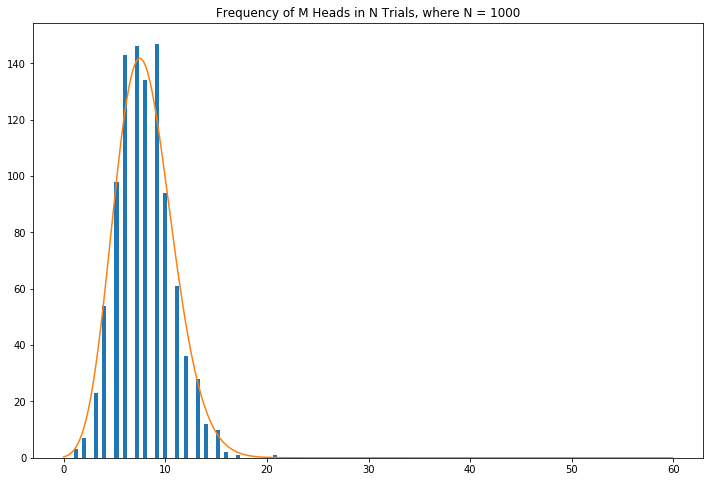

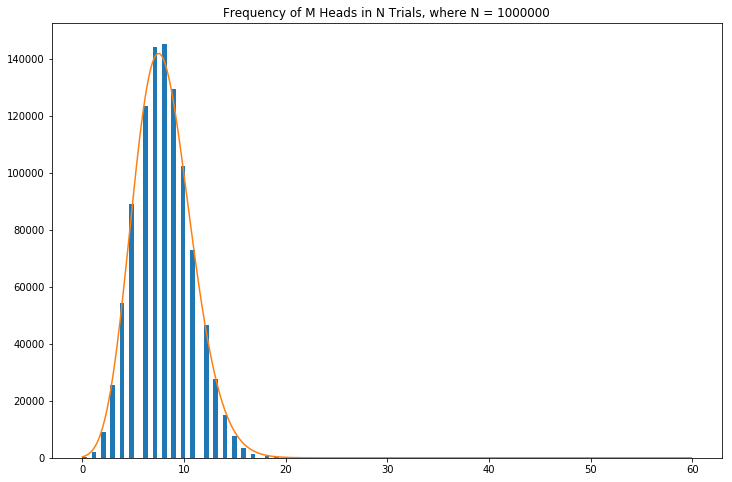

In [7]:
#Section 7.3 Assignment ~ Solutions
#7.3.1 The Poisson Distribution
#Part (a)
def poisson(l):
    '''
    Poisson Distribution for a coin toss
    Predicts the probability of the coin coming up heads l times in 100 flips
    l is an integer greater than or equal to 0
    '''
    return (np.exp(-8) * (8**l)) / sc.factorial(l)

l = np.arange(0, 60, 0.1)
poisson_dist = poisson(l)
plt.figure(figsize=(12,8))
plt.plot(l, poisson_dist)
plt.title("The Poisson Distribution"); plt.xlabel("l"); plt.ylabel("P(l)")
plt.show()

#Part (b)
def coin_flip_trials(N):
    trial = rng(N)
    trial[trial > 0.08] = 0 #The 0's are tails
    trial[trial != 0] = 1 #The 1's are heads
    num_heads = np.sum(trial)
    return num_heads

#Part (c)
# M = coin_flip_trials(1000)
# print(M)

M = list()
for i in np.arange(0, 1000, 1):
    M.append(coin_flip_trials(100))
plt.figure(figsize=(12,8))
plt.hist(M, bins=50)
plt.title("Frequency of M Heads in N Trials, where N = 1000")

#Part (d)
N = 1000
poisson_N = poisson(l)
plt.plot(l, (poisson_N * N))
plt.show()

#Part (e)
M_large = list()
for i in np.arange(0, 1000000, 1):
    M_large.append(coin_flip_trials(100))
plt.figure(figsize=(12,8))
plt.hist(M_large, bins=50)

N_large = 1000000
poisson_N_large = poisson(l)
plt.plot(l, (poisson_N_large * N_large))
plt.title("Frequency of M Heads in N Trials, where N = 1000000")
plt.show()

#Comments
'''
When we increase N from 1,000 to 1,000,000, we see that the data still fits the Poisson distribution nicely, and
actually fits the curve somewhat better than when N was 1,000. This makes sense because the probability of M heads
should be the same for any value of N. Increasing N to higher numbers just diminishes any outliers. The pattern is
still the same overall, as shown below.
'''

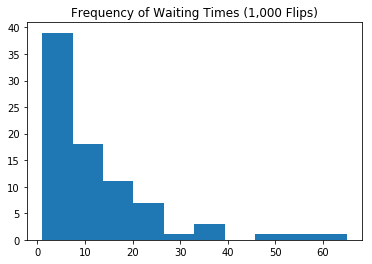

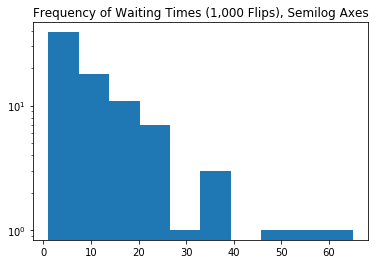

The average waiting time between heads (for 1,000 flips) is 11.9


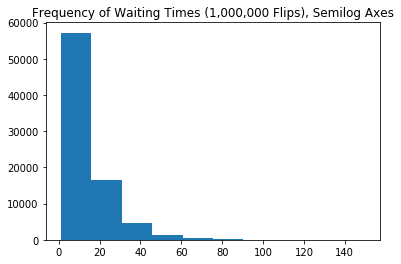

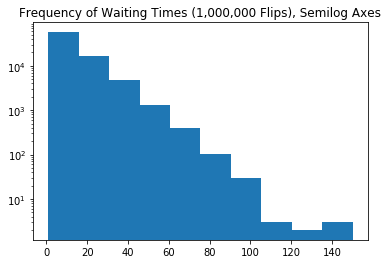

The average waiting time between heads (for 1,000,000 flips) is 12.48


In [33]:
#7.3.2 Waiting Times
#Part (a)
def random_string(num_flips):
    string = rng(num_flips) 
    string[string > 0.08] = 0 #The 0's are tails
    string[string != 0] = 1 #The 1's are heads
    return string

string = random_string(1000)
nonzero_indices = np.nonzero(string)
waiting_times = np.diff(nonzero_indices)
wtf = waiting_times.flatten()
plt.hist(wtf)
plt.title("Frequency of Waiting Times (1,000 Flips)")
plt.show()

plt.hist(wtf)
plt.yscale("log")
plt.title("Frequency of Waiting Times (1,000 Flips), Semilog Axes")
plt.show()

#Part (b)
average = np.mean(wtf)
print("The average waiting time between heads (for 1,000 flips) is", np.round(average, 2))

#Part (c)
string2 = random_string(1000000)
nonzero_indices2 = np.nonzero(string2)
waiting_times2 = np.diff(nonzero_indices2)
wtf2 = waiting_times2.flatten()
plt.hist(wtf2)
plt.title("Frequency of Waiting Times (1,000,000 Flips), Semilog Axes")
plt.show()

plt.hist(wtf2)
plt.yscale("log")
plt.title("Frequency of Waiting Times (1,000,000 Flips), Semilog Axes")
plt.show()

average2 = np.mean(wtf2)
print("The average waiting time between heads (for 1,000,000 flips) is", np.round(average2, 2))